# Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Munich (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [2]:
bbox = BboxSelector([
    11.446380615234375, # min_x
    48.03218251603595, # min_y
    11.678466796874998, # max_x
    48.194471974688206  # max_y
])
#requested data for some part of Munich

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=20) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,GPS Speed.value,GPS Speed.unit,Throttle Position.value,Throttle Position.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage.value,...,Consumption.value,Consumption.unit,GPS PDOP.value,GPS PDOP.unit,CO2.value,CO2.unit,GPS VDOP.value,GPS VDOP.unit,GPS HDOP.value,GPS HDOP.unit
0,5e1893c81126d80318be7150,2020-01-10T14:45:31,POINT (11.51580 48.10977),53.394848,km/h,89.000000,%,1.566468,ratio,0.402643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e1893c81126d80318be7152,2020-01-10T14:45:34,POINT (11.51529 48.10950),56.124000,km/h,89.000000,%,1.897866,ratio,0.551453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e1893c81126d80318be7153,2020-01-10T14:45:36,POINT (11.51494 48.10930),62.534338,km/h,89.000002,%,1.657168,ratio,0.444792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e1893c81126d80318be7154,2020-01-10T14:45:38,POINT (11.51454 48.10907),67.635041,km/h,89.000003,%,1.892940,ratio,0.553365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e1893c81126d80318be7155,2020-01-10T14:45:40,POINT (11.51414 48.10884),67.572722,km/h,89.000002,%,1.589403,ratio,0.537282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,574c6414e4b09078f97a65b3,2016-05-28T15:30:49,POINT (11.54857 48.14219),32.077173,km/h,1.000000,%,NaN,NaN,NaN,...,NaN,NaN,1.0,precision,NaN,NaN,0.8,precision,0.7,precision
30,574c6414e4b09078f97a65b4,2016-05-28T15:30:54,POINT (11.54863 48.14262),38.025890,km/h,2.000000,%,NaN,NaN,NaN,...,NaN,NaN,1.0,precision,NaN,NaN,0.8,precision,0.7,precision
31,574c6414e4b09078f97a65b5,2016-05-28T15:30:59,POINT (11.54872 48.14310),35.753269,km/h,0.408369,%,NaN,NaN,NaN,...,NaN,NaN,1.0,precision,NaN,NaN,0.8,precision,0.7,precision
32,574c6414e4b09078f97a65b6,2016-05-28T15:31:04,POINT (11.54877 48.14348),27.020265,km/h,1.745710,%,NaN,NaN,NaN,...,NaN,NaN,1.0,precision,NaN,NaN,0.8,precision,0.7,precision


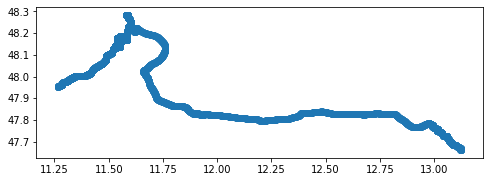

In [3]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

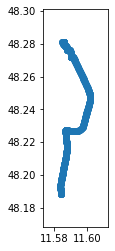

In [4]:
some_track_id = track_df['track.id'].unique()[13] #finding one id checking for 13th track
some_track = track_df[track_df['track.id'] == some_track_id] #finding the track
some_track.plot()

#### Available attributes in the data

In [5]:
track_df.dtypes

id                              object
time                            object
geometry                      geometry
GPS Speed.value                float64
GPS Speed.unit                  object
Throttle Position.value        float64
Throttle Position.unit          object
O2 Lambda Voltage ER.value     float64
O2 Lambda Voltage ER.unit       object
O2 Lambda Voltage.value        float64
O2 Lambda Voltage.unit          object
Engine Load.value              float64
Engine Load.unit                object
MAF.value                      float64
MAF.unit                        object
GPS Altitude.value             float64
GPS Altitude.unit               object
Intake Temperature.value       float64
Intake Temperature.unit         object
Speed.value                    float64
Speed.unit                      object
Rpm.value                      float64
Rpm.unit                        object
GPS Bearing.value              float64
GPS Bearing.unit                object
Intake Pressure.value    

#### Length of the track

In [16]:
some_track["track.length"].sum()

7254.2389476454455

#### Number of Segments

In [19]:
len(some_track)

622

#### Plotting the Elevation of the Segments

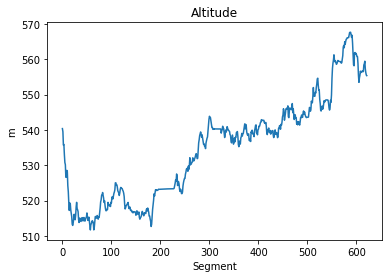

In [6]:
ax = some_track['GPS Altitude.value'].plot()
ax.set_title("Altitude")
ax.set_ylabel(some_track['GPS Altitude.unit'][0])
ax.set_xlabel("Segment")
ax

#### General Statistics of GPS Altitude 

In [22]:
track_df["GPS Altitude.value"].describe()

count    9786.000000
mean      573.329004
std        51.756912
min       470.999989
25%       541.246029
50%       561.982643
75%       587.091131
max       762.999989
Name: GPS Altitude.value, dtype: float64

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [26]:
import folium

# print(some_track["geometry"]) #= coord 

# print(list(some_track["geometry"].y)) #coord.y

#why is this not working

# list(some_track["geometry"].y)

# print(some_track["geometry"].apply(lambda coord: coord.y))

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
# print(lats)
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], tiles = 'Stamen Terrain', zoom_start=12)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='red').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [7]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state #, mapbox_key=<mapbox-key-here>
)
r.to_html('tracks_muenster.html', iframe_width=900)

'/home/hafenkran/dev/envirocar/envirocar-py/examples/tracks_muenster.html'